In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(maps)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
disney_plus_df <- read.csv("disney_plus_titles.csv", stringsAsFactors = FALSE)
hulu_df <- read.csv("hulu_titles.csv", stringsAsFactors = FALSE)
amazon_prime_df <- read.csv("amazon_prime_titles.csv", stringsAsFactors = FALSE)
netflix_df <- read.csv("netflix_titles.csv", stringsAsFactors = FALSE)
movies_df <- read.csv("MoviesOnStreamingPlatforms.csv", stringsAsFactors = FALSE)
tv_shows_df <- read.csv("tv_shows.csv", stringsAsFactors = FALSE)

In [3]:
movies_df$movies <- 1
movies_df$tv_shows <- 0

In [4]:
tv_shows_df$movies <- 0
tv_shows_df$tv_shows <- 1

In [5]:
all_columns <- union(names(movies_df), names(tv_shows_df))
movies_df[setdiff(all_columns, names(movies_df))] <- NA
tv_shows_df[setdiff(all_columns, names(tv_shows_df))] <- NA
movies_df <- movies_df[all_columns]
tv_shows_df <- tv_shows_df[all_columns]

In [6]:
combined_df <- rbind(movies_df, tv_shows_df)
head(combined_df, 20)

X,ID,Title,Year,Age,Rotten.Tomatoes,Netflix,Hulu,Prime.Video,Disney.,Type,movies,tv_shows,IMDb
<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
0,1,The Irishman,2019,18+,98/100,1,0,0,0,0,1,0,NA
1,2,Dangal,2016,7+,97/100,1,0,0,0,0,1,0,NA
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0,1,0,NA
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0,1,0,NA
4,5,Roma,2018,18+,94/100,1,0,0,0,0,1,0,NA
5,6,To All the Boys I've Loved Before,2018,13+,94/100,1,0,0,0,0,1,0,NA
6,7,The Social Dilemma,2020,13+,93/100,1,0,0,0,0,1,0,NA
7,8,Okja,2017,13+,92/100,1,0,0,0,0,1,0,NA
8,9,The Ballad of Buster Scruggs,2018,16+,92/100,1,0,0,0,0,1,0,NA


In [7]:
combined_df <- subset(combined_df, select = -X)
head(combined_df)

ID,Title,Year,Age,Rotten.Tomatoes,Netflix,Hulu,Prime.Video,Disney.,Type,movies,tv_shows,IMDb
<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,The Irishman,2019,18+,98/100,1,0,0,0,0,1,0,NA
2,Dangal,2016,7+,97/100,1,0,0,0,0,1,0,NA
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0,1,0,NA
4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0,1,0,NA
5,Roma,2018,18+,94/100,1,0,0,0,0,1,0,NA
6,To All the Boys I've Loved Before,2018,13+,94/100,1,0,0,0,0,1,0,NA


In [8]:
map_country_and_type <- function(original_df, combined_df, platform_name) {
  country_dict <- setNames(original_df$country, original_df$title)
  combined_df[[paste0(platform_name, "_country")]] <- country_dict[combined_df$Title]
  type_dict <- setNames(original_df$type, original_df$title)
  combined_df$movies <- ifelse(type_dict[combined_df$Title] == "Movie", 1, 0)
  combined_df$tv_shows <- ifelse(type_dict[combined_df$Title] == "TV Show", 1, 0)
  
  return(combined_df)
}

In [9]:
map_attributes <- function(original_df, combined_df, platform_name) {
  country_dict <- setNames(original_df$country, original_df$title)
  combined_df[paste0(platform_name, "_country")] <- country_dict[combined_df$Title]
  
  if('IMDb' %in% names(original_df)) {
    imdb_dict <- setNames(original_df$IMDb, original_df$title)
    combined_df$IMDb <- ifelse(is.na(combined_df$IMDb), imdb_dict[combined_df$Title], combined_df$IMDb)
  }
  
  return(combined_df)
}

In [10]:
combined_df <- map_country_and_type(disney_plus_df, combined_df, 'disney_plus')
combined_df <- map_country_and_type(hulu_df, combined_df, 'hulu')
combined_df <- map_country_and_type(amazon_prime_df, combined_df, 'amazon_prime')
combined_df <- map_country_and_type(netflix_df, combined_df, 'netflix')
head(combined_df)

ID,Title,Year,Age,Rotten.Tomatoes,Netflix,Hulu,Prime.Video,Disney.,Type,movies,tv_shows,IMDb,disney_plus_country,hulu_country,amazon_prime_country,netflix_country
<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,The Irishman,2019,18+,98/100,1,0,0,0,0,1,0,NA,NA,NA,NA,United States
2,Dangal,2016,7+,97/100,1,0,0,0,0,1,0,NA,NA,NA,NA,India
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0,1,0,NA,NA,NA,NA,"United States, United Kingdom"
4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0,NA,NA,NA,NA,NA,NA,NA
5,Roma,2018,18+,94/100,1,0,0,0,0,NA,NA,NA,NA,NA,NA,NA
6,To All the Boys I've Loved Before,2018,13+,94/100,1,0,0,0,0,NA,NA,NA,NA,NA,NA,NA


In [11]:
combined_df$Type <- NULL
head(combined_df)

ID,Title,Year,Age,Rotten.Tomatoes,Netflix,Hulu,Prime.Video,Disney.,movies,tv_shows,IMDb,disney_plus_country,hulu_country,amazon_prime_country,netflix_country
<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,The Irishman,2019,18+,98/100,1,0,0,0,1,0,NA,NA,NA,NA,United States
2,Dangal,2016,7+,97/100,1,0,0,0,1,0,NA,NA,NA,NA,India
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,1,0,NA,NA,NA,NA,"United States, United Kingdom"
4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,NA,NA,NA,NA,NA,NA,NA
5,Roma,2018,18+,94/100,1,0,0,0,NA,NA,NA,NA,NA,NA,NA
6,To All the Boys I've Loved Before,2018,13+,94/100,1,0,0,0,NA,NA,NA,NA,NA,NA,NA


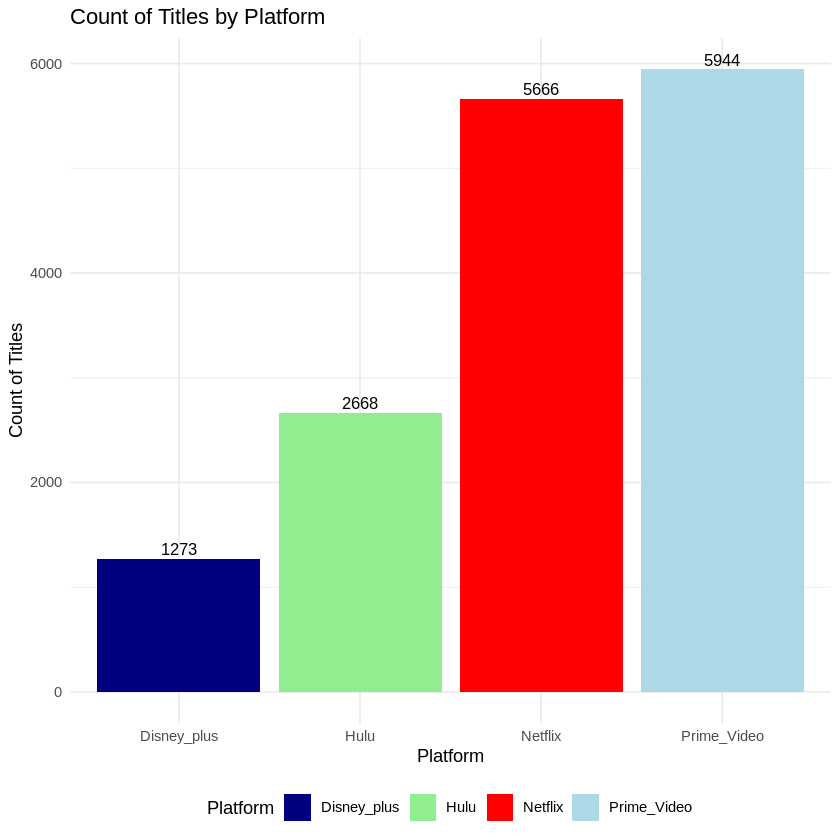

In [12]:
platform_counts <- combined_df %>%
  summarise(Netflix = sum(Netflix, na.rm = TRUE),Hulu = sum(Hulu, na.rm = TRUE),Prime_Video = sum(`Prime.Video`, na.rm = TRUE),
            Disney_plus = sum(`Disney.`, na.rm = TRUE)) %>%
  pivot_longer(cols = everything(), names_to = "Platform", values_to = "Count")

ggplot(platform_counts, aes(x = Platform, y = Count, fill = Platform)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = Count), vjust = -0.3, size = 3.5) +
  scale_fill_manual(values = c('Netflix' = 'red', 'Disney_plus' = 'navy blue', 'Prime_Video' = 'light blue', 'Hulu' = 'light green')) +
  labs(x = "Platform", y = "Count of Titles", title = "Count of Titles by Platform", fill = "Platform") +
  theme_minimal() +
  theme(legend.position = "bottom")

Warning message:
“Removed 3791 rows containing non-finite values (stat_bin).”Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”

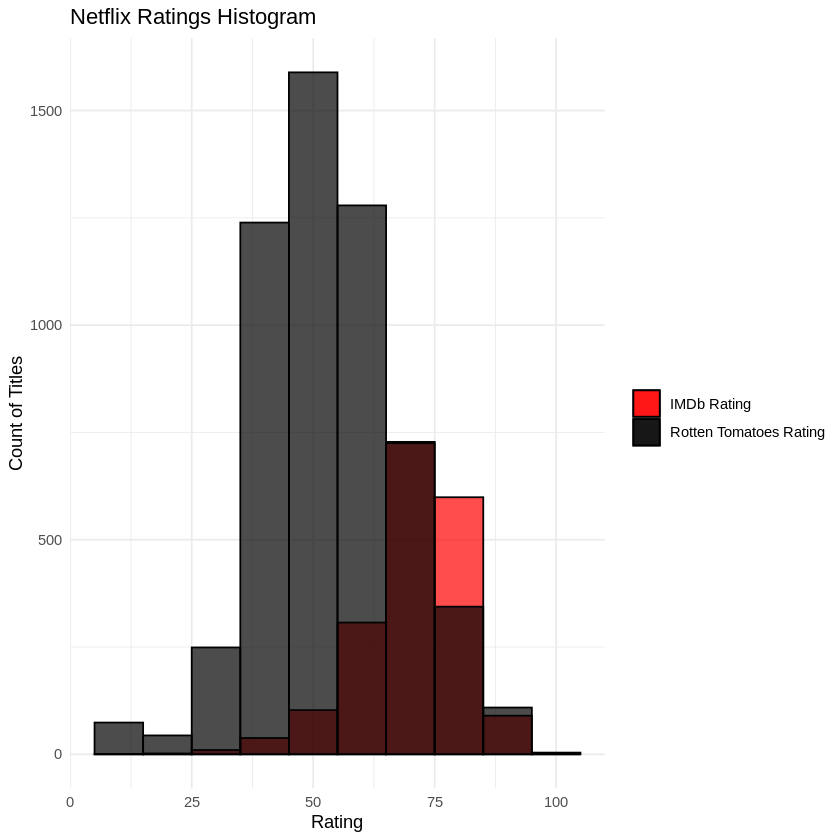

In [13]:
combined_df$IMDb_numeric <- as.numeric(sub("/10", "", combined_df$IMDb)) * 10
combined_df$Rotten_Tomatoes_numeric <- as.numeric(sub("/100", "", combined_df$Rotten.Tomatoes))

plot_combined_histogram <- function(df, platform_name) {
  platform_df <- df %>% filter(get(platform_name) == 1)

  ratings_long <- platform_df %>%
    select(IMDb_numeric, Rotten_Tomatoes_numeric) %>%
    pivot_longer(cols = c("IMDb_numeric", "Rotten_Tomatoes_numeric"), names_to = "rating_type", values_to = "rating")

  ggplot(ratings_long, aes(x = rating, fill = rating_type)) + 
    geom_histogram(data = subset(ratings_long, rating_type == "IMDb_numeric"), binwidth = 10, alpha = 0.7, position = "identity", color = "black") +
    geom_histogram(data = subset(ratings_long, rating_type == "Rotten_Tomatoes_numeric"),  binwidth = 10, alpha = 0.7, position = "identity", color = "black") +
    scale_fill_manual(values = c("IMDb_numeric" = "red", "Rotten_Tomatoes_numeric" = "black"),
    labels = c("IMDb Rating", "Rotten Tomatoes Rating")) +
    theme_minimal() +
    labs(title = paste(platform_name, "Ratings Histogram"), x = "Rating", y = "Count of Titles", fill = "Rating Type") +
    theme(legend.title = element_blank())
}

platforms <- c("Netflix", "Hulu", "Disney.", "Prime.Video")
platform_histograms <- lapply(platforms, function(platform_name) plot_combined_histogram(combined_df, platform_name))

print(platform_histograms[[1]])

Warning message:
“Removed 1250 rows containing non-finite values (stat_bin).”

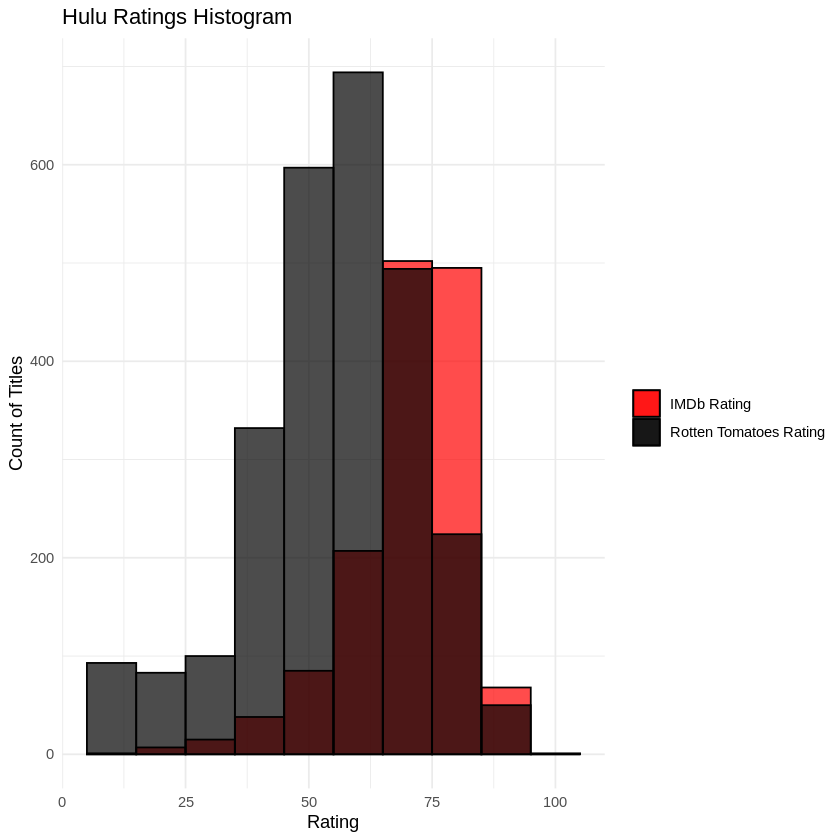

In [14]:
print(platform_histograms[[2]])

Warning message:
“Removed 958 rows containing non-finite values (stat_bin).”

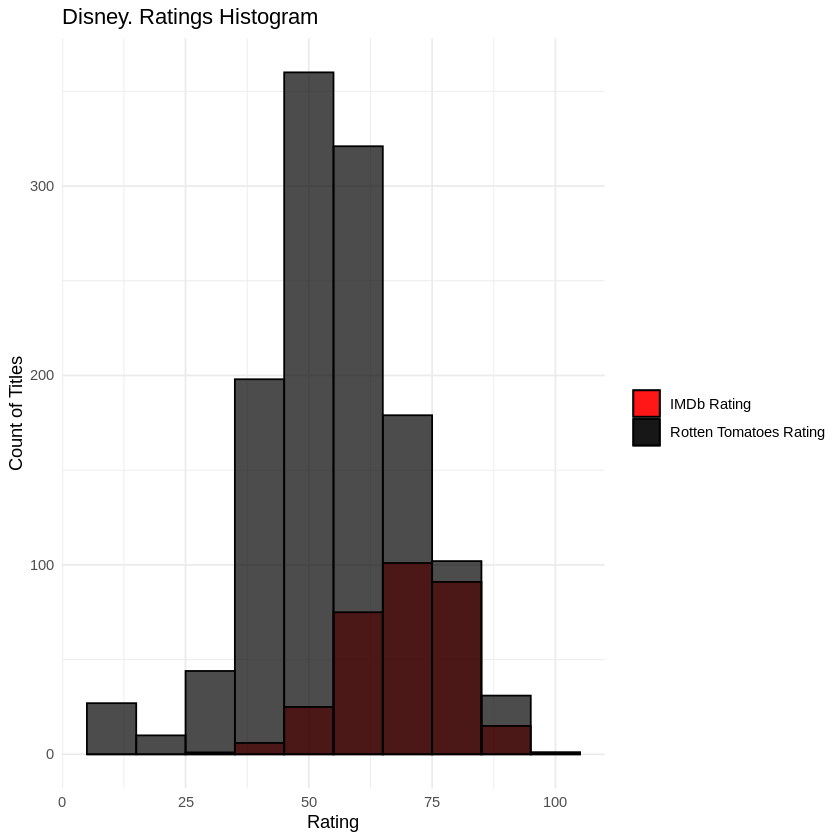

In [15]:
print(platform_histograms[[3]])

Warning message:
“Removed 4762 rows containing non-finite values (stat_bin).”

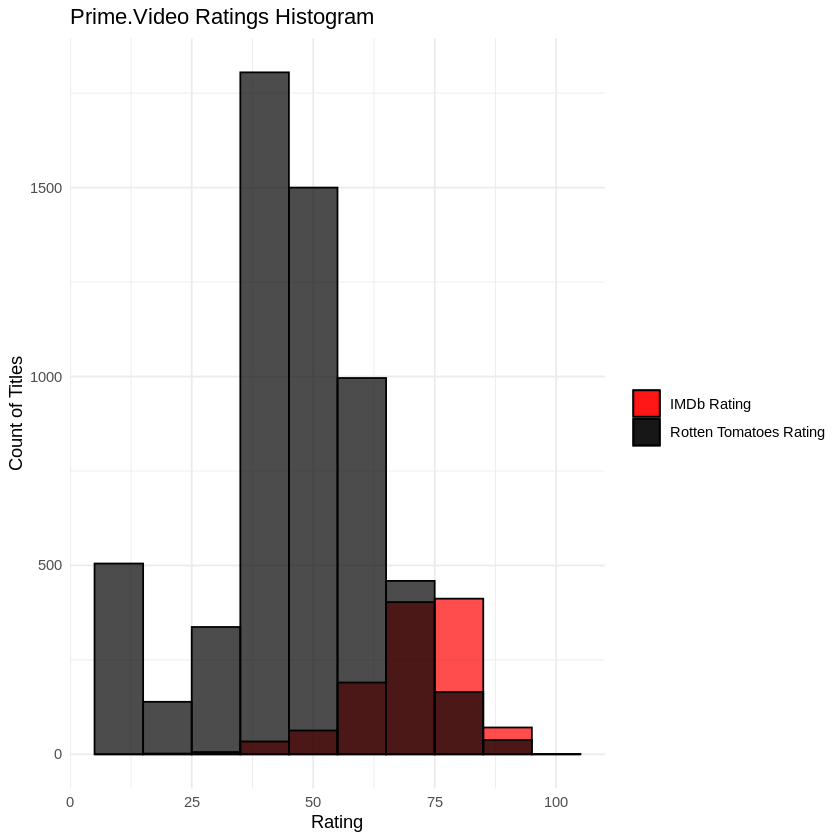

In [16]:
print(platform_histograms[[4]])

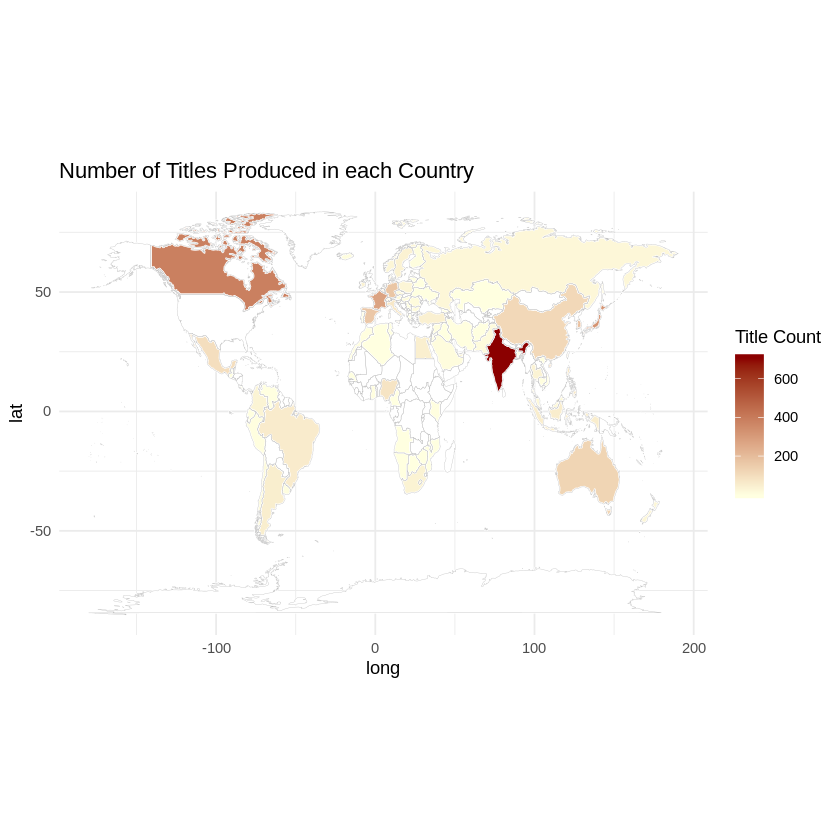

In [17]:
combined_countries <- combined_df %>%
  select(disney_plus_country, hulu_country, amazon_prime_country, netflix_country) %>%
  pivot_longer(cols = everything(), values_to = "country") %>%
  filter(!is.na(country)) %>%
  separate_rows(country, sep = ",") %>%
  mutate(country = trimws(country)) %>%
  group_by(country) %>%
  summarize(count = n(), .groups = 'drop')

world_map <- map_data("world")
world_map_data <- left_join(world_map, combined_countries, by = c("region" = "country"))

ggplot(data = world_map_data) +
  geom_polygon(aes(x = long, y = lat, group = group, fill = count), color = "white") + 
  geom_polygon(data = world_map, aes(x = long, y = lat, group = group), fill = NA, color = "gray", size = 0.1) + 
  scale_fill_continuous(low = "lightyellow", high = "darkred", na.value = "white", name = "Title Count") +
  labs(title = "Number of Titles Produced in each Country") +
  theme_minimal() +
  coord_fixed(ratio = 1.5)

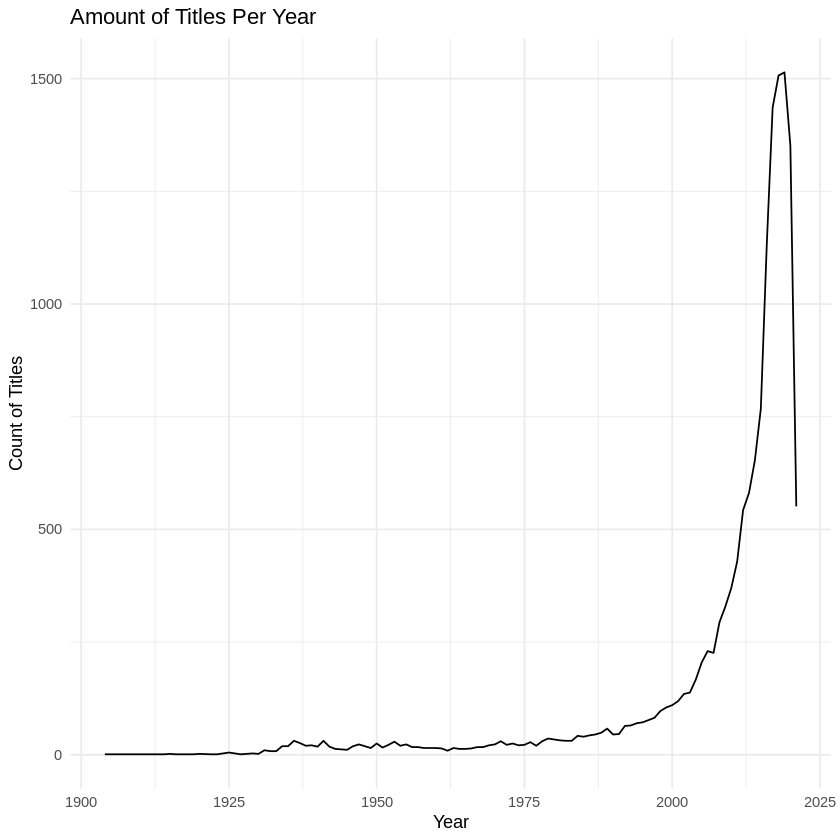

In [18]:
titles_per_year <- combined_df %>%
  group_by(Year) %>%
  summarize(Count = n(), .groups = 'drop') %>%
  arrange(Year)

ggplot(titles_per_year, aes(x = Year, y = Count)) +
  geom_line() +
  theme_minimal() +
  labs(x = "Year", y = "Count of Titles", title = "Amount of Titles Per Year")

In [19]:
platform_counts <- combined_df %>%
  summarise(Netflix = sum(Netflix, na.rm = TRUE), Hulu = sum(Hulu, na.rm = TRUE), Prime_Video = sum(`Prime.Video`, na.rm = TRUE),
  Disney_plus = sum(`Disney.`, na.rm = TRUE))
print(platform_counts)

  Netflix Hulu Prime_Video Disney_plus
1    5666 2668        5944        1273


In [20]:
unique_country_count <- n_distinct(combined_countries$country)
print(unique_country_count)

[1] 104
